# sunpy's Timeseries and Map

In this session we will give a quick introduction to the two classes in sunpy used to hold data.


In [177]:
import numpy as np
import matplotlib.pyplot as plt

import astropy.units as u
from astropy.coordinates import SkyCoord

import sunpy.map
import sunpy.timeseries
from sunpy.data.sample import AIA_171_IMAGE, HMI_LOS_IMAGE, GOES_XRS_TIMESERIES

Maps from all instruments are created using the `sunpy.map.Map` 'factory'. This class takes a wide variety of map-like inputs, for one or more maps and returns you one or many maps.
All maps, irrespective of the instrument, behave the same and expose the same functions and properties, however, depending on the instrument different metadata might be read or corrections made.
One example of this is to avoid inaccuracies in the observer position coordinate for AIA data the `HAE[XYZ]_OBS` keys rather than the usual default `HGLN/HGLT`.

In [16]:
aia171 = sunpy.map.Map(AIA_171_IMAGE)

Observatory,SDO
Instrument,AIA 3
Detector,AIA
Measurement,171.0 Angstrom
Wavelength,171.0 Angstrom
Observation Date,2011-06-07 06:33:02
Exposure Time,0.234256 s
Dimension,[1024. 1024.] pix
Coordinate System,helioprojective
Scale,[2.402792 2.402792] arcsec / pix
Reference Pixel,[511.5 511.5] pix

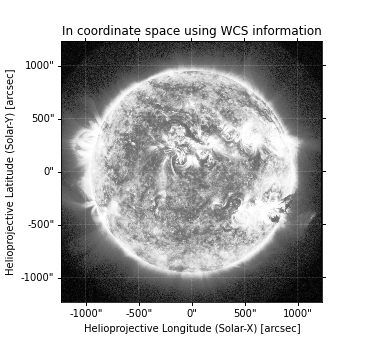
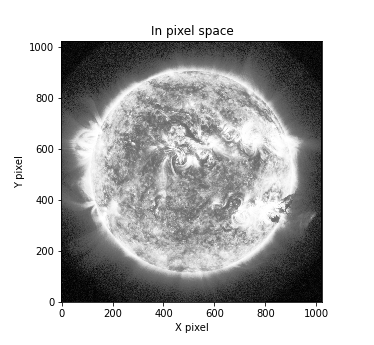
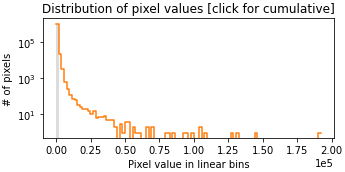
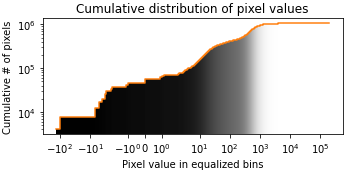

In [17]:
aia171

### Metadata

To provide a consistent interface to useful metadata about an image over all different instruments, `Map` has a set of attributes which give access to common metadata.
Some examples of these are:

In [35]:
# The instrument name (normally INSTRUME in a FITS header)
aia171.instrument

'AIA 3'

In [36]:
# The radius of the sun in angular and distance units
aia171.rsun_obs, aia171.rsun_meters

(<Quantity 945.436711 arcsec>, <Quantity 6.96e+08 m>)

In [37]:
# The location of the observer
aia171.observer_coordinate

<SkyCoord (HeliographicStonyhurst: obstime=2011-06-07T06:33:02.770, rsun=696000.0 km): (lon, lat, radius) in (deg, deg, m)
    (-0.00406308, 0.04787238, 1.51846026e+11)>

In [38]:
# The coordinate frame of the data
aia171.coordinate_frame

<Helioprojective Frame (obstime=2011-06-07T06:33:02.770, rsun=696000.0 km, observer=<HeliographicStonyhurst Coordinate (obstime=2011-06-07T06:33:02.770, rsun=696000.0 km): (lon, lat, radius) in (deg, deg, m)
    (-0.00406308, 0.04787238, 1.51846026e+11)>)>

In [41]:
# The astropy.wcs object used internally to convert from world to pixel coordinates
aia171.wcs

WCS Keywords

Number of WCS axes: 2
CTYPE : 'HPLN-TAN'  'HPLT-TAN'  
CRVAL : 0.00089530541880571  0.00038493926472939  
CRPIX : 512.5  512.5  
PC1_1 PC1_2  : 0.99999706448085  0.0024230207763071  
PC2_1 PC2_2  : -0.0024230207763071  0.99999706448085  
CDELT : 0.00066744222222222  0.00066744222222222  
NAXIS : 0  0

All the underlying metadata can be accessed with `.meta`

In [39]:
aia171.meta

MetaDict([('simple', True),
          ('bitpix', -32),
          ('naxis', 2),
          ('naxis1', 1024),
          ('naxis2', 1024),
          ('pcount', 0),
          ('gcount', 1),
          ('xtension', 'BINTABLE'),
          ('bld_vers', 'V5R12X'),
          ('lvl_num', 1.5),
          ('t_rec', '2011-06-07T06:33:03Z'),
          ('trecstep', 1.0),
          ('trecepoc', '1977.01.01_00:00:00_TAI'),
          ('trecroun', 1),
          ('origin', 'SDO'),
          ('date', '2012-10-16T19:45:34'),
          ('telescop', 'SDO'),
          ('instrume', 'AIA_3'),
          ('date-obs', '2011-06-07T06:33:02.77'),
          ('t_obs', '2011-06-07T06:33:02.88Z'),
          ('camera', 3),
          ('img_type', 'LIGHT'),
          ('exptime', 0.234256),
          ('expsdev', 0.000135),
          ('int_time', 0.507812),
          ('wavelnth', 171),
          ('waveunit', 'angstrom'),
          ('wave_str', '171_THIN'),
          ('fsn', 27194331),
          ('fid', 0),
          ('quallev0'

### Plotting

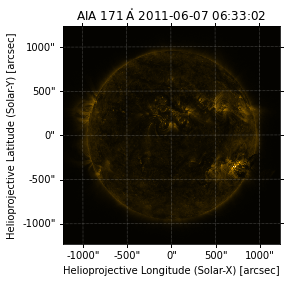

In [28]:
aia171.plot()

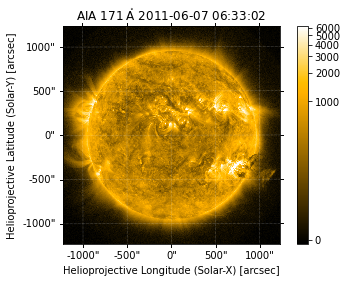

In [179]:
aia171.plot(clip_interval=[1, 99.9]*u.percent)
plt.colorbar()

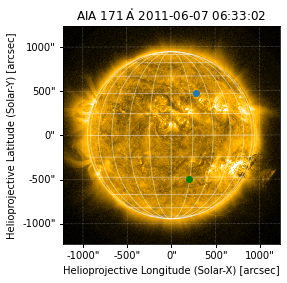

In [181]:
plt.figure()

ax = plt.subplot(projection=aia171)
aia171.plot(axes=ax, clip_interval=[1, 99.9]*u.percent)

aia171.draw_grid()

ax.plot_coord(SkyCoord(200*u.arcsec, -500*u.arcsec, frame=aia171.coordinate_frame), 'go')

ax.plot_coord(SkyCoord(20*u.deg, 30*u.deg, frame='heliographic_stonyhurst'), 'o')

## Overplotting and Aligning Multiple Maps

In this example we are going to work with an AIA and a HMI image simultaneously to demonstrate the coordinate aware nature of sunpy's maps.
These data are used as a well known example of unaligned data.

In [134]:
aia171, hmilos = sunpy.map.Map(AIA_171_IMAGE, HMI_LOS_IMAGE)

Observatory,SDO
Instrument,HMI FRONT2
Detector,HMI
Measurement,magnetogram
Wavelength,6173.0
Observation Date,2011-06-07 06:32:11
Exposure Time,Unknown
Dimension,[1024. 1024.] pix
Coordinate System,helioprojective
Scale,[2.01714 2.01714] arcsec / pix
Reference Pixel,[511.5 511.5] pix

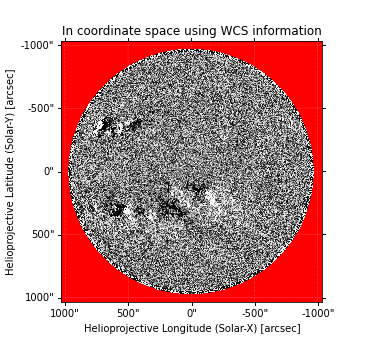
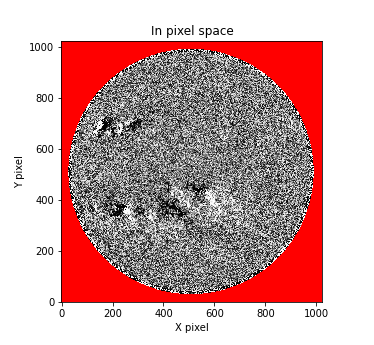
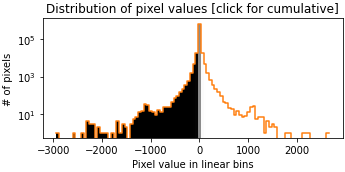
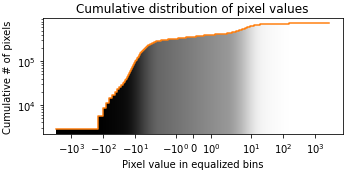

In [135]:
hmilos

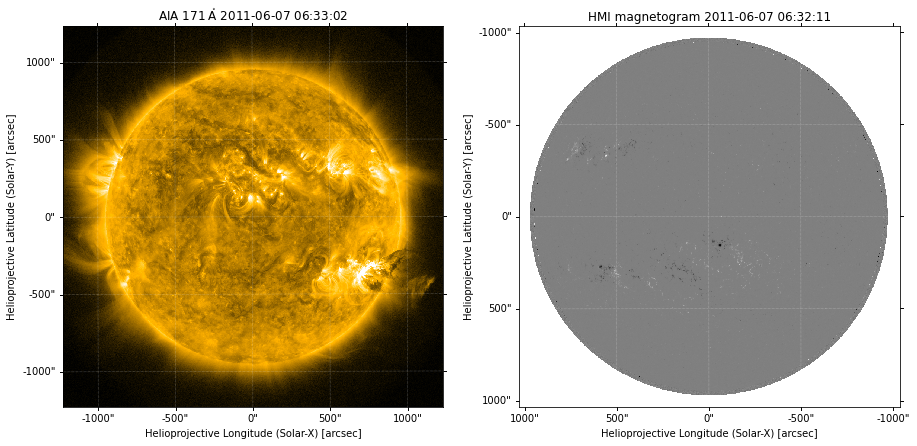

In [136]:
plt.figure(figsize=(15, 9))
plt.subplot(1, 2, 1, projection=aia171)
aia171.plot(clip_interval=[1, 99.9]*u.percent)

plt.subplot(1, 2, 2, projection=hmilos)
hmilos.plot(vmin=-1500, vmax=1500)

### Alignment with contours

In [168]:
n = 11
lim = 800 * u.Gauss
levels = np.linspace(-1 * lim, lim, n)
# Remove 0
levels = np.delete(levels, (n-1)//2)

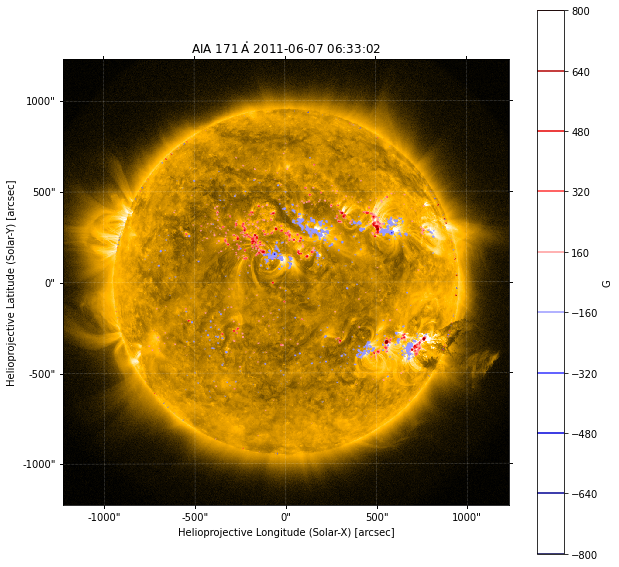

In [172]:
plt.figure(figsize=(10,10))
plt.subplot(projection=aia171)
aia171.plot(clip_interval=[1, 99.9]*u.percent)
lines = hmilos.draw_contours(levels, cmap="seismic")
plt.colorbar(lines, ticks=levels, label=u.Gauss)

### Overplotting images

In [157]:
cmap = plt.get_cmap('hmimag')

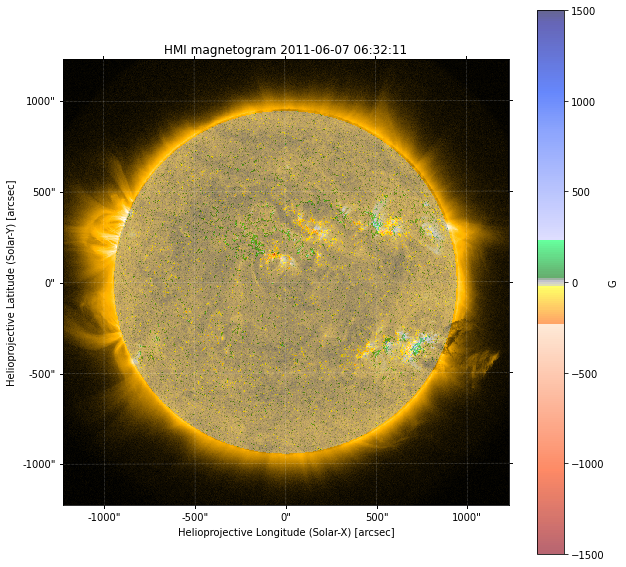

In [163]:
plt.figure(figsize=(10,10))
plt.subplot(projection=aia171)
aia171.plot(clip_interval=[1, 99.9]*u.percent)
hmilos.plot(vmin=-1500, vmax=1500, cmap="hmimag", autoalign=True, alpha=0.6)
plt.colorbar(label=u.Gauss)

For an example of co-aligning images not just for plotting see the example in the sunpy gallery on [Aligning AIA and HMI Data with Reproject](https://docs.sunpy.org/en/latest/generated/gallery/map_transformations/reprojection_align_aia_hmi.html).

## Timeseries Data

In [19]:
xrsts = sunpy.timeseries.TimeSeries(GOES_XRS_TIMESERIES)

In [22]:
xrsts